# Step-by-step evaluation of FVS-A 2

A modification of the fast vertex substitution for ANPCP (FVS-A) is going to be evaluated step by step. The changes are stated in the Jupyter notebook where FVS-A was evaluated, it can be found in the current directory.

## Initial fixed data

In [1]:
from models.instance import Instance
from models.solver import Solver
from models.vertex import Vertex

In [2]:
users = [
    Vertex(0, 5, 80),
    Vertex(1, 43, 34),
    Vertex(2, 22, 70),
    Vertex(3, 80, 10),
    Vertex(4, 9, 11),
    Vertex(5, 60, 75)
]

facilities = [
    Vertex(0, 30, 50),
    Vertex(1, 81, 61),
    Vertex(2, 11, 21),
    Vertex(3, 55, 25)
]

instance = Instance(users, facilities)

- $n = 6$
- $m = 4$
- $p = 3$
- $\alpha = 2$

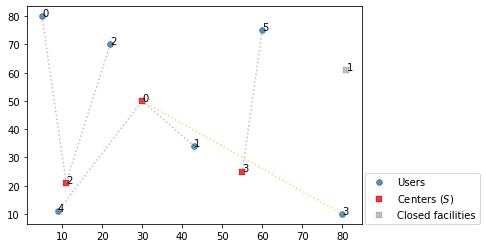

In [3]:
solver = Solver(instance, 3, 2)

solver.solution.open_facilities = {0, 2, 3}
solver.solution.closed_facilities = {1}
solver.allocate_all()
solver.update_obj_func()

solver.plot()

The critical allocation determines $x$, which is the objective function value:

In [4]:
solver.solution.critical_allocation

AllocatedFacility(index=0, user=3, distance=64)

The critical facility $f_*$ is $f_0$, the critical user $u_*$ is $u_3$, and their distance is $x = 64$.

## The algorithm

### Iteration 1

In [5]:
import sys

best_obj_func = sys.maxsize
best_in = -1
best_out = -1

#### Loop closed facilities

In [6]:
solver.solution.closed_facilities

{1}

If $f_1$ is inserted then $f_i = f_1$. Its distance to $u_*$ would be

In [7]:
fi_distance = solver.instance.get_distance(3, 1)
fi_distance

51

which is less than $x$, $51 < 64$. This means the $x$ can be broken and find a better value, so $f_i$ remains as $f_1$.

Now let's evaluate `move()`.

##### Find a facility to remove from the solution, $f_r$, given that $f_i = f_1$.

In [8]:
current_of = 0
r = {0:0, 2:0, 3:0}
z = {0:0, 2:0, 3:0}

###### Loop users

In [9]:
solver.instance.users_indexes

{0, 1, 2, 3, 4, 5}

For user $u_0$

In [10]:
u_fi_dist = solver.instance.get_distance(0, 1)
u_fi_dist

78

In [11]:
closests = solver.get_alpha_range_closests(0)
closests

{1: AllocatedFacility(index=0, user=0, distance=39),
 2: AllocatedFacility(index=2, user=0, distance=59),
 3: AllocatedFacility(index=3, user=0, distance=74)}

The set of $\alpha$-neighbors of $u_0$ is $\Alpha_u = \{ f_0, f_2 \}$. 

The $\alpha^\textrm{th}$ (in this case the *second*, $\alpha = 2$) closest facility of $u_0$, or its center, is $f_2$,

$$\phi_\alpha(u) = f_2$$
$$\phi_2(u_0) = f_2$$

$f_i$ is not closer to $u_0$ than $\phi_\alpha$,

$$d_i > d_\alpha$$
$$78 > 59$$

So data structures $r$ and $z$ get updated with the contributions of $u_0$ as follows: 

- $r(f_j \in \Alpha_0) \leftarrow \max\{ r(f_j), d_\alpha \}$
- $z(f_j \in \Alpha_0) \leftarrow \max\{ r(f_j), \min\{ d_i, d_{\alpha + 1} \} \}$

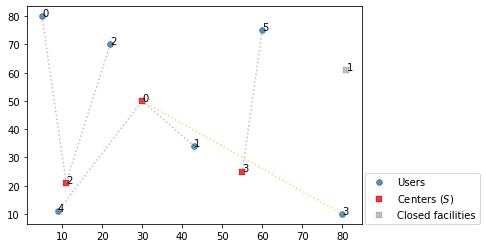

In [44]:
solver.plot()

For $f_0$:

In [12]:
r[0]

0

In [13]:
closests[2].distance

59

- $r(f_0) \leftarrow \max\{ 0, 59 \}$

In [14]:
r[0] = 59

- $z(f_0) \leftarrow \max\{ z(f_0), \min\{ d_i, d_{3} \} \}$

In [15]:
z[0]

0

In [16]:
u_fi_dist

78

In [17]:
closests[3].distance

74

- $z(f_0) \leftarrow \max\{ 0, \min\{ 78, 74 \} \}$

In [18]:
min(78, 74)

74

- $z(f_0) \leftarrow \max\{ 0, 74 \}$

In [19]:
z[0] = 74

Next $f_2$

In [20]:
r[2]

0

- $r(f_2) \gets \max\{ 0, 59 \} $

In [21]:
r[2] = 59

In [22]:
z[2]

0

- $z(f_2) \leftarrow \max\{ 0, \min\{ 78, 74 \} \}$

In [23]:
z[2] = 74

Next user $u_1$

In [24]:
u_fi_dist = solver.instance.get_distance(1, 1)
u_fi_dist

47

In [25]:
closests = solver.get_alpha_range_closests(1)
closests

{2: AllocatedFacility(index=0, user=1, distance=21),
 3: AllocatedFacility(index=2, user=1, distance=35),
 1: AllocatedFacility(index=3, user=1, distance=15)}

In [26]:
closests[2]

AllocatedFacility(index=0, user=1, distance=21)

$\phi_{\alpha = 2} = f_0 $

$d_\alpha = 21$

$d_i > d_\alpha$ so update $r$ and $z$ using the same calculations as previous user:

$\Alpha_1 \leftarrow \{ f_3, f_0 \}$

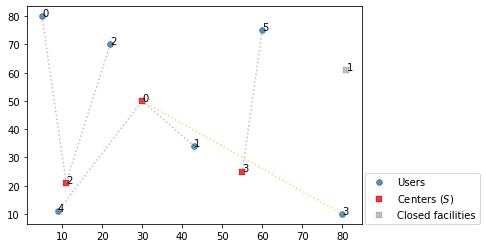

In [45]:
solver.plot()

In [27]:
r[3]

0

In [28]:
r[3] = 21

In [29]:
z[3]

0

In [30]:
min(47, 35)

35

In [31]:
z[3] = 35

In [32]:
r[0]

59

In [33]:
max(59, 21)

59

- $r(f_0)$ didn't change.

In [34]:
z[0]

74

In [35]:
max(74, 35)

74

- $z(f_0)$ didn't change either.

Next user $u_2$

In [36]:
u_fi_dist = solver.instance.get_distance(2, 1)
u_fi_dist

60

In [37]:
closests = solver.get_alpha_range_closests(2)
closests

{1: AllocatedFacility(index=0, user=2, distance=22),
 2: AllocatedFacility(index=2, user=2, distance=50),
 3: AllocatedFacility(index=3, user=2, distance=56)}

$60 > 50$ so update $r$ and $z$.

$\Alpha_2 \leftarrow \{ f_0, f_2 \}$

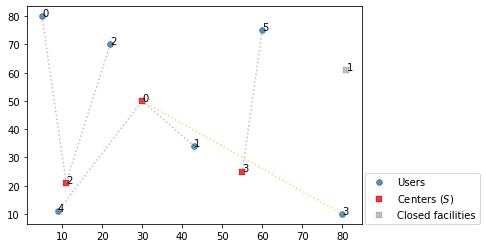

In [47]:
solver.plot()

In [38]:
r[0]

59

$d_\alpha = 50$ 

In [39]:
max(59, 50)

59

- $r(f_0)$ didn't change.

In [40]:
z[0]

74

In [41]:
min(60, 56)

56

- $z(f_0)$ didn't change either.

In [42]:
r[2]

59

In [43]:
z[2]

74

- $z(f_2)$ and $r(f_2)$ didn't change either.

Next user $u_3$

In [48]:
u_fi_dist = solver.instance.get_distance(3, 1)
u_fi_dist

51

In [49]:
closests = solver.get_alpha_range_closests(3)
closests

{2: AllocatedFacility(index=0, user=3, distance=64),
 3: AllocatedFacility(index=2, user=3, distance=70),
 1: AllocatedFacility(index=3, user=3, distance=29)}

$u_3 = u_*$. This is the case that breaks $x$, the reason to enter this current loop, because $d_\alpha(u_3) = 64$ is $x$, and $d_i = 51$ is less than that.

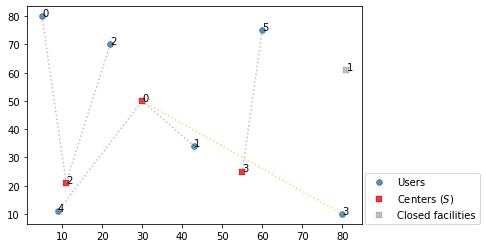

In [50]:
solver.plot()

In this case,
$$ d_{\alpha - 1} < d_i < d_\alpha \\ 29 < 51 < 64 $$

This means that the new center of $u_3$ is $f_i$, because if inserted, it becomes the $\alpha^\textrm{th}$ closest of $u_3$,
$$ \phi_\alpha \gets f_i = f_1 $$

assuming that $u_3$ maintains all of its $\alpha$-neighbors.

So update the current objective function $x'$:

- $x' \leftarrow \max\{ x', d_i, d_{\alpha - 1} \}$

In [51]:
current_of

0

- $x' \leftarrow \max\{ 0, 51, 29 \}$

In [52]:
current_of = 51

Because this user is attracted by $f_i$, it contributes too to data structures but differently than the previous users which are not attracted:

$$N_u \gets \Alpha_u \setminus \{ \phi_\alpha \}$$

- $r(f_j \in N_u) \gets \max\{ r(f_j), d_i, d_{\alpha - 1} \} $
- $z(f_j \in N_u) \gets \max\{ z(f_j), d_\alpha \} $

For this user, $N_3 = \{ f_3 \} $:

In [53]:
r[3]

21

In [54]:
max(21, 51, 29)

51

In [55]:
r[3] = 51

In [56]:
z[3]

35

In [57]:
max(35, 64)

64

In [58]:
z[3] = 64

Next user $u_4$

In [59]:
u_fi_dist = solver.instance.get_distance(4, 1)
u_fi_dist

88

In [60]:
closests = solver.get_alpha_range_closests(4)
closests

{2: AllocatedFacility(index=0, user=4, distance=44),
 1: AllocatedFacility(index=2, user=4, distance=10),
 3: AllocatedFacility(index=3, user=4, distance=48)}

$88 > 44$ so update $r$ and $z$.

$\Alpha_4 \leftarrow \{ f_2, f_0 \}$

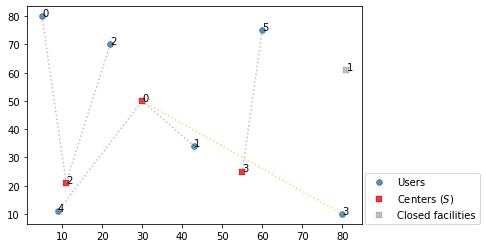

In [68]:
solver.plot()

In [63]:
r[2]

59

In [64]:
z[2]

74

In [65]:
min(88, 48)

48

In [66]:
r[0]

59

In [67]:
z[0]

74

No changes to $z$ nor $r$ for $u_4$.

Next user $u_5$

In [69]:
u_fi_dist = solver.instance.get_distance(5, 1)
u_fi_dist

25

In [70]:
closests = solver.get_alpha_range_closests(5)
closests

{1: AllocatedFacility(index=0, user=5, distance=39),
 3: AllocatedFacility(index=2, user=5, distance=73),
 2: AllocatedFacility(index=3, user=5, distance=50)}

$f_i$ is closer than $\phi_\alpha$, but also closer than $\phi_{\alpha - 1}$, meaning that the new center for $u_5$ is just transferred to the previous open facility from the $\alpha^\textrm{th}$ closest one,

$$ d_i < d_{\alpha - 1} \therefore \phi_\alpha \gets \phi_{\alpha - 1} $$

Let's update $x'$:

In [71]:
current_of

51

In [72]:
max(51, 25, 39)

51

- $x'$ didn't improve.

$N_5 = \{ f_0 \} $

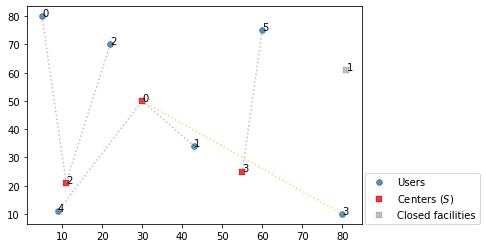

In [74]:
solver.plot()

In [75]:
r[0]

59

In [76]:
max(59, 25, 39)

59

In [77]:
z[0]

74

###### Find best deletion

All users were compared, let's check the data structures.

$x'$ is the objective function of users who are attracted to $f_i$:

In [79]:
current_of

51

$r(f_j \in \Alpha_u)$ stores the radius (the distance to the farthest user) of each $\alpha$-neighbor if it remains as a neighbor:

In [80]:
r

{0: 59, 2: 59, 3: 51}

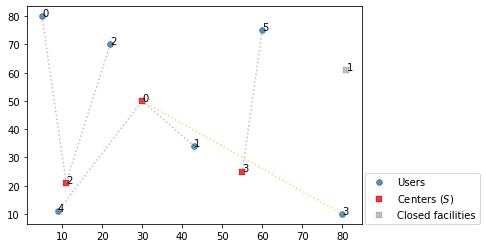

[[39, 78, 59, 74],
 [21, 47, 35, 15],
 [22, 60, 50, 56],
 [64, 51, 70, 29],
 [44, 88, 10, 48],
 [39, 25, 73, 50]]

In [81]:
solver.plot()
solver.instance.distances

$z(f_j \in \Alpha_u)$ stores, for each $\alpha$-neighbor, the resulting radius of the group of its assigned users if that neighbor is removed from the solution:

In [82]:
z

{0: 74, 2: 74, 3: 64}

The largest distance, $g_1$, and the second largest distance, $g_2$, from $r$ are:

In [84]:
from models.moved_facility import MovedFacility

g1 = MovedFacility(0, 59)
g2 = MovedFacility(2, 59)

Let $j_*$ be the corresponding index of $g_1$: $j_* = 0$.

Find $f_r$,

$$f_r = \min_{f_j \in S}\{ \max\{ x', z(f_j), \max_{l \neq j}{r(f_l)} \} \}$$

$g_1$ and $g_2$ can be used to skip the loop that calculates $r(f_l)$:

$$
    f_r = \min_{f_j \in S}{
        \begin{cases}
        \max\{ x', z(f_j), g_1 \},
            & \text{if } j \ne j_* \\
        \max\{ x', z(f_j), g_2 \},
            & \text{otherwise}
        \end{cases}
    }
$$

Loop open facilities in the solution $S$, which are also the keys of $z$ and $r$:

In [85]:
solver.solution.open_facilities

{0, 2, 3}

For $j = 0$, $j = j_*$ so $g_2$ is used as $r(f_l) = 59$:

In [86]:
max(51, 74, 59)

74

Now there's a base facility to remove, $f_r \gets f_{j = 0}$ with $x_* = 74$.

In [87]:
fr = MovedFacility(0, 74)

For $j = 2$, $j \ne j_*$ so $g_1$ is used:

In [88]:
max(51, 74, 59)

74

$74 = 74$ so $x_*$ didn't improved and $f_r = f_0$ is maintained...

For $j = 3$, $j \ne j_*$ so $g_1$ is used:

In [89]:
max(51, 64, 59)

64

$64 < 74$, therefore $x_*$ improved and now $f_r \gets f_3$:

In [91]:
fr = MovedFacility(3, 64)

The best facility to remove from the solution $f_r$ is $f_3$, given that $f_1$ is inserted. Now we have the needed data to apply the swap, interchange or substitution.

This is the current solution and visualization:

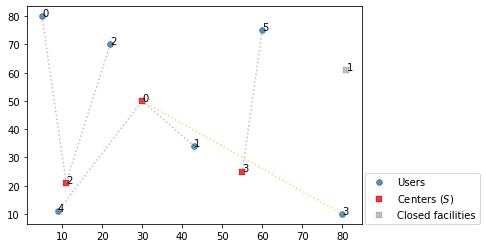

In [92]:
solver.plot()

Now the swap:

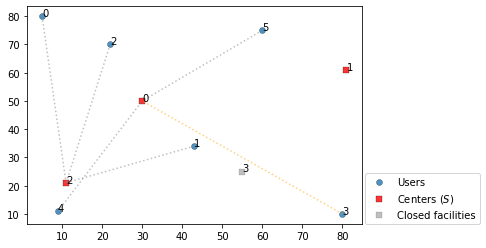

Solution(open_facilities={0, 1, 2}, critical_allocation=AllocatedFacility(index=0, user=3, distance=64))

In [93]:
solver.swap(1, 3)
solver.plot()
solver.solution

## Conclusion

Finally, data structures told us accurately the resulting objective function value if $f_i$ is replaced by $f_r$, meaning that this modification of FVS-A works and will be used for coming experimentation.

In this case, the objective function after the swap didn't even change, so the swap wouldn't have been applied if it were an iteration.